In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils.quack import Quack

In [2]:
rushes = Quack.query("""
with raw as (
select pbp.desc,pbp.game_id, pbp.yards_gained,ids.gsis_id,
					 pbp.season,
					 pbp.week,
					 pbp.ydstogo,
					 pbp.down,
					 pbp.touchdown,
	case when pbp.down = 1 then 1 else 0 end as is_first_down,
	case when pbp.down = 2 then 1 else 0 end as is_second_down,
	case when pbp.down = 3 then 1 else 0 end as is_third_down,
	case when pbp.down = 4 then 1 else 0 end as is_fourth_down,
	case when yards_gained <= 0 then 1 else 0 end as stuffed,
	case when yards_gained >= ydstogo and ydstogo <= 2 then 1 
		 when yards_gained <= ydstogo and ydstogo <= 2 then 0 end as short_first,
	case when yards_gained < ydstogo and (yards_gained <= 3 and yards_gained >= 1) then 1 else 0 end as mediocre,
	case when yards_gained between 3 and 9 then 1 else 0 end as decent_run,
	case when yards_gained >= 10 then 1 else 0 end as explosive,
	case when yards_gained >= 20 then 1 else 0 end as huge_play,
					 epa,
	pbp.first_down, pbp.touchdown
    ,rusher_player_name
    ,rusher_id,
	season,
	week,
	qb_scramble,
					 ids.name
	from pbp 
	join ids on pbp.rusher_id = ids.gsis_id
	where pbp.play_type = 'run'
	and pbp.yards_gained is not null
	and pbp.down is not null
	and pbp.penalty = 0
	and pbp.fumble = 0
	and season > 2000
	)
	select  
* from raw
order by season, week
""")

rushes

,desc,game_id,yards_gained,gsis_id,season,week,ydstogo,down,touchdown,is_first_down,...,huge_play,epa,first_down,touchdown_1,rusher_player_name,rusher_id,season_1,week_1,qb_scramble,name
0,(4:32) 49-T.Richardson to LV 29 for -1 yards (...,2001_01_OAK_KC,-1.0,00-0013694,2001,1,10.0,2.0,0.0,0,...,0,-0.916144,0.0,0.0,T. Richardson,00-0013694,2001,1,0.0,Tony Richardson
1,(14:52) 49-T.Richardson right end to KC 22 for...,2001_01_OAK_KC,2.0,00-0013694,2001,1,10.0,1.0,0.0,1,...,0,-0.527541,0.0,0.0,T. Richardson,00-0013694,2001,1,0.0,Tony Richardson
2,(13:06) 49-T.Richardson up the middle to KC 31...,2001_01_OAK_KC,-2.0,00-0013694,2001,1,10.0,1.0,0.0,1,...,0,-0.891649,0.0,0.0,T. Richardson,00-0013694,2001,1,0.0,Tony Richardson
3,(6:49) 49-T.Richardson up the middle to LV 13 ...,2001_01_OAK_KC,-1.0,00-0013694,2001,1,10.0,1.0,0.0,1,...,0,-0.675594,0.0,0.0,T. Richardson,00-0013694,2001,1,0.0,Tony Richardson
4,(:37) 49-T.Richardson up the middle to KC 32 f...,2001_01_OAK_KC,2.0,00-0013694,2001,1,10.0,1.0,0.0,1,...,0,-0.391140,0.0,0.0,T. Richardson,00-0013694,2001,1,0.0,Tony Richardson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257070,(4:11) (Shotgun) 31-N.Miller-Hines right tackl...,2025_08_MIN_LAC,1.0,00-0034367,2025,8,10.0,1.0,0.0,1,...,0,-0.583515,0.0,0.0,N.Miller-Hines,00-0034367,2025,8,0.0,Nyheim Hines
257071,(3:26) 31-N.Miller-Hines right guard to MIN 26...,2025_08_MIN_LAC,-3.0,00-0034367,2025,8,9.0,2.0,0.0,0,...,0,-0.930368,0.0,0.0,N.Miller-Hines,00-0034367,2025,8,0.0,Nyheim Hines
257072,(2:44) 32-J.Patterson left end to MIN 27 for -...,2025_08_MIN_LAC,-1.0,00-0036755,2025,8,12.0,3.0,0.0,0,...,0,-0.798186,0.0,0.0,J.Patterson,00-0036755,2025,8,0.0,Jaret Patterson
257073,(1:46) (Shotgun) 36-Z.Scott right tackle to LA...,2025_08_MIN_LAC,6.0,00-0038440,2025,8,10.0,2.0,0.0,0,...,0,0.248796,0.0,0.0,Z.Scott,00-0038440,2025,8,0.0,Zavier Scott


In [3]:
cnt = rushes[['name', 'gsis_id']].value_counts().reset_index()
#cnt = cnt.loc[cnt['count'] > 80]
cnt.head(15)

,name,gsis_id,count
0,Frank Gore,00-0023500,3787
1,Adrian Peterson,00-0025394,3267
2,LaDainian Tomlinson,00-0020536,3233
3,Steven Jackson,00-0022736,2747
4,Thomas Jones,00-0019641,2636
5,Marshawn Lynch,00-0025399,2599
6,Derrick Henry,00-0032764,2567
7,LeSean McCoy,00-0027029,2462
8,Matt Forte,00-0026184,2352
9,Clinton Portis,00-0021179,2238


In [4]:
cnt.loc[cnt.name=='James Conner']

,name,gsis_id,count
43,James Conner,00-0033553,1372


In [5]:
lg_avg = rushes[['stuffed','mediocre', 'explosive', 'huge_play', 'first_down', 'short_first', 'epa', 'yards_gained']].mean()
lg_avg = lg_avg.to_frame().T
padding = cnt.merge(lg_avg, how='cross')
padding = pd.concat([padding] * 20, ignore_index=True)
padding['season'] = 2000
padding['week'] = 1

In [6]:
lg_avg

,stuffed,mediocre,explosive,huge_play,first_down,short_first,epa,yards_gained
0,0.1884,0.314842,0.107902,0.024647,0.233597,0.6831,-0.024942,4.285053


In [7]:
data = pd.concat((rushes[['name','gsis_id','stuffed','mediocre', 'explosive', 'huge_play', 'first_down', 'short_first', 'epa', 'yards_gained', 'season','week']], padding)).sort_values(by=['season','week','name'])

In [8]:
mean = data.groupby(['name', 'gsis_id'])[['stuffed','mediocre', 'explosive', 'huge_play', 'first_down', 'short_first', 'epa', 'yards_gained']].transform(lambda x: x.ewm(span=150, min_periods=10).mean())
#mean = mean.merge(cnt)
mean[['season','week','name','gsis_id']] = data[['season','week','name','gsis_id']]
mean = mean.groupby(['name','gsis_id','season','week']).tail(1)
mean = mean.drop('yards_gained', axis=1)

In [9]:
#Quack.query('create or replace table rusher_adv as select * from mean')
import duckdb

# Assuming 'mean' is your Pandas DataFrame
con = duckdb.connect("data/nfl.duckdb")

# Register the DataFrame
con.register("mean_df", mean)

# Now you can create a DuckDB table from it
con.execute("CREATE OR REPLACE TABLE rusher_adv AS SELECT * FROM mean_df")
con.close()

In [10]:
con.close()

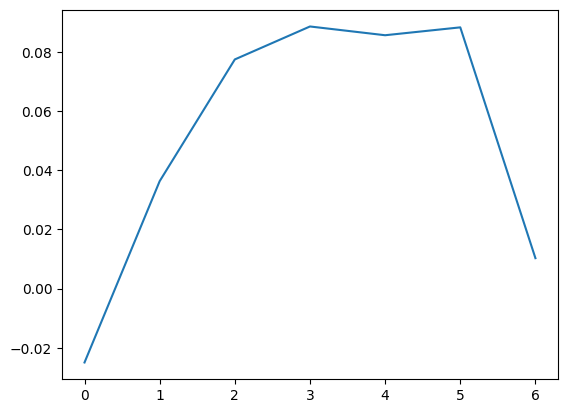

In [11]:
out = mean.loc[mean.name=="Quinshon Judkins"].copy().reset_index(drop=True)
out = out.groupby(['name','gsis_id','season','week']).tail(1)
plt.plot(out['epa'])

In [12]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate fake data
X = np.random.rand(100, 2)

# Fit KMeans
kmeans = KMeans(n_clusters=8, random_state=42)
labels = kmeans.fit_predict(mean[['stuffed',
 'mediocre',
 'explosive',
 'huge_play',
 'first_down',
 'short_first',
 'epa']].fillna(0))



In [13]:
mean['cluster'] = labels

In [14]:
mean.sort_values(by='cluster').head(30)

,stuffed,mediocre,explosive,huge_play,first_down,short_first,epa,season,week,name,gsis_id,cluster
139323,0.215114,0.277191,0.125796,0.033369,0.239442,0.844314,-0.012545,2016,5,Isaiah Crowell,00-0030656,0
139532,0.143391,0.347449,0.146115,0.012610,0.243994,0.800901,0.002990,2016,5,Fozzy Whittaker,00-0029731,0
256494,0.198277,0.314667,0.098922,0.025853,0.198310,0.780962,-0.049480,2025,7,D'Ernest Johnson,00-0035628,0
256474,0.165424,0.279540,0.073946,0.016384,0.238504,0.765845,-0.001341,2025,7,Chuba Hubbard,00-0036555,0
256859,0.146798,0.339818,0.106379,0.007529,0.271800,0.731635,-0.013621,2025,7,Cam Skattebo,00-0040715,0
256462,0.169396,0.351987,0.113272,0.023978,0.242175,0.740789,-0.069772,2025,7,Breece Hall,00-0038120,0
257020,0.146586,0.264788,0.090413,0.025079,0.241392,0.753503,0.023147,2025,7,Javonte Williams,00-0036997,0
256660,0.122145,0.328320,0.083121,0.005753,0.231436,0.724601,-0.116912,2025,7,Isiah Pacheco,00-0037197,0
84541,0.180347,0.298202,0.112720,0.015252,0.250547,0.740814,-0.049387,2011,18,Brian Leonard,00-0025439,0
139049,0.184171,0.296967,0.074627,0.019121,0.191977,0.756953,-0.017955,2016,5,Carlos Hyde,00-0031045,0


In [15]:
mea

NameError: name 'mea' is not defined